Travail réalisé par Aginth Muthulingam 

# Chargement module

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

# Chargement Base de données 

In [2]:
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
print('shape df_2016 : ', df_2016.shape)

shape df_2016 :  (3376, 46)


# Nettoyage

## elimination des outliers 

In [4]:
set(df_2016['Outlier'])

{'High outlier', 'Low outlier', nan}

In [5]:
index_low = list(df_2016[df_2016['Outlier']=='Low outlier'].index)
index_high = list(df_2016[df_2016['Outlier']=='High outlier'].index)
index_out = index_low+index_high

In [6]:
df_2016_v2 = df_2016.drop(index_out)

## elimination des colonnes avec +de 80% de val manquantes

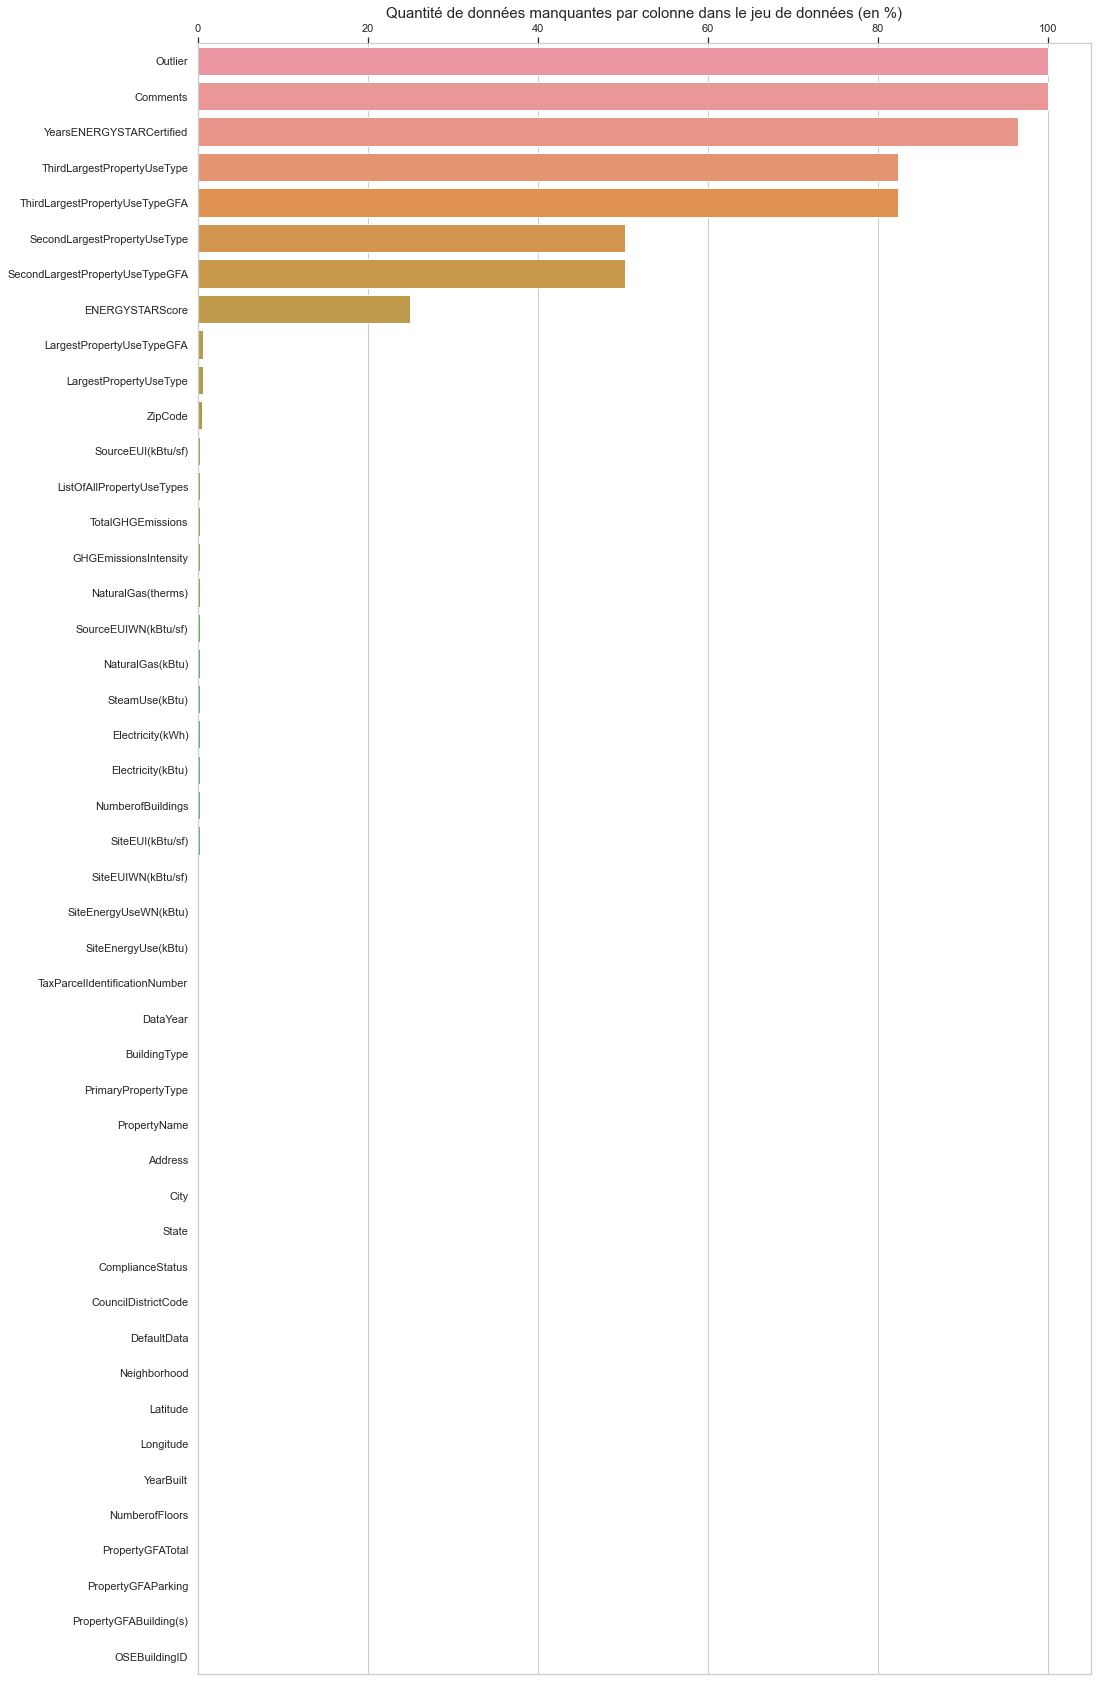

In [7]:
proportion_nan = df_2016_v2.isna().sum().divide(df_2016_v2.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [8]:
df_2016_v3 = df_2016_v2.copy()[list(proportion_nan[proportion_nan<80].index)]

In [9]:
df_dup = df_2016_v3['OSEBuildingID'].duplicated()

In [10]:
print('Valeur dupliqué = ', len(df_dup[df_dup==True]))

Valeur dupliqué =  0


## elimination des outlier 2

In [11]:
def suppression_outliers(dataset):
#Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme

    dataframe =dataset.copy()
    for col in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
            print(col)
            index_nan = []
            index_nan += dataframe.loc[dataframe[col] > dataframe[col].quantile(0.995)].index.tolist()
            index_nan += dataframe.loc[dataframe[col] < dataframe[col].quantile(0.005)].index.tolist()
        
            
            dataframe[col].loc[index_nan] = np.nan
            
            
    return dataframe

In [12]:
df_2016_v3b=suppression_outliers(df_2016_v3)

SecondLargestPropertyUseTypeGFA
ENERGYSTARScore
LargestPropertyUseTypeGFA
ZipCode
SourceEUI(kBtu/sf)
TotalGHGEmissions
GHGEmissionsIntensity
NaturalGas(therms)
SourceEUIWN(kBtu/sf)
NaturalGas(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NumberofBuildings
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SiteEnergyUseWN(kBtu)
SiteEnergyUse(kBtu)
Latitude
Longitude


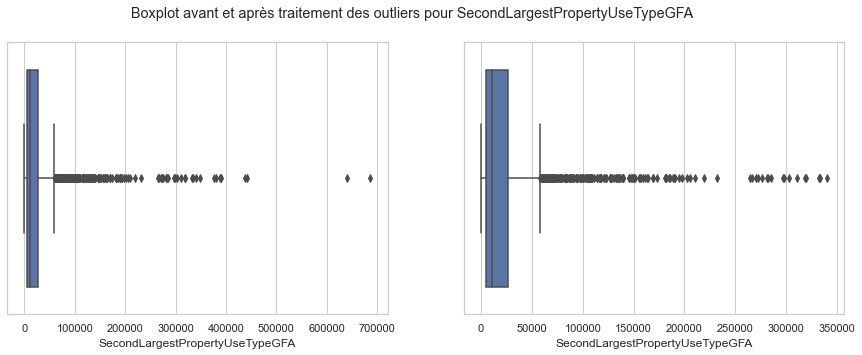

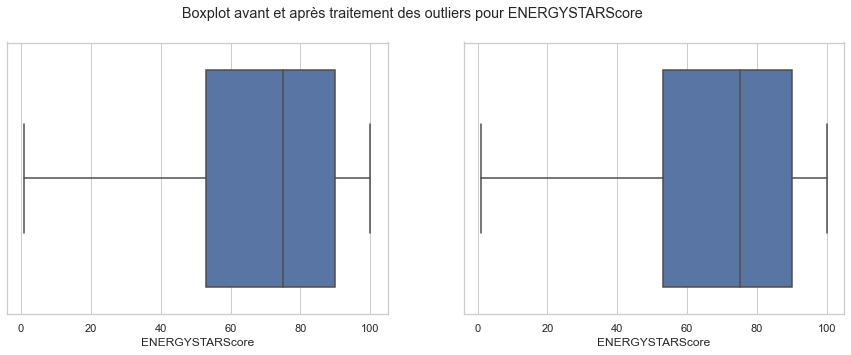

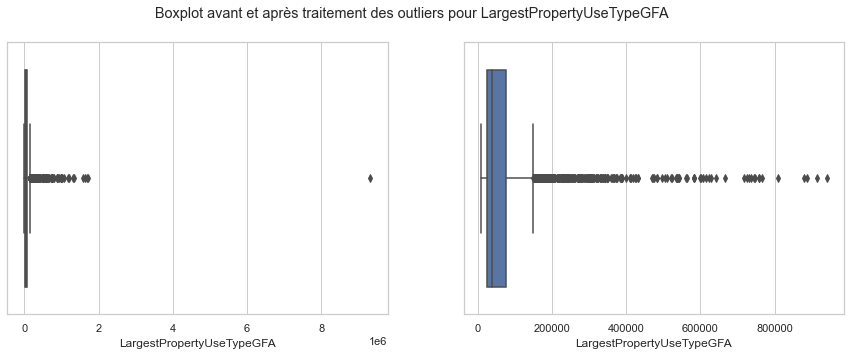

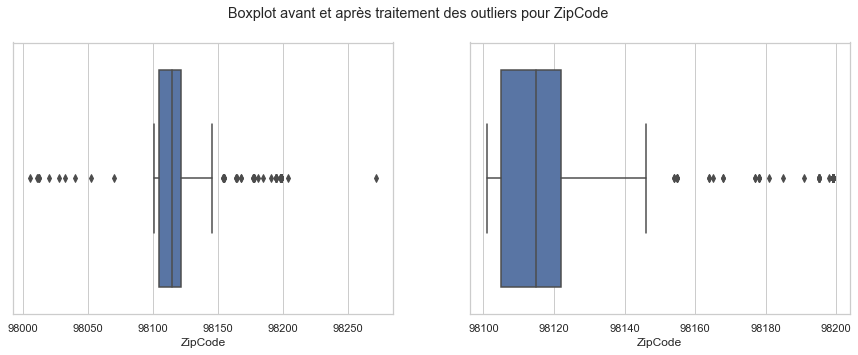

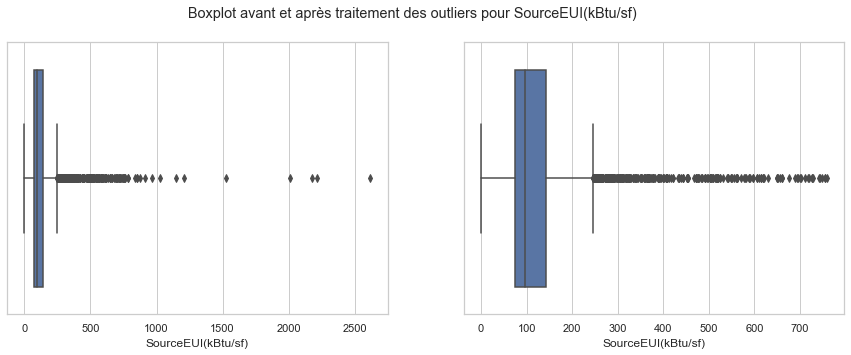

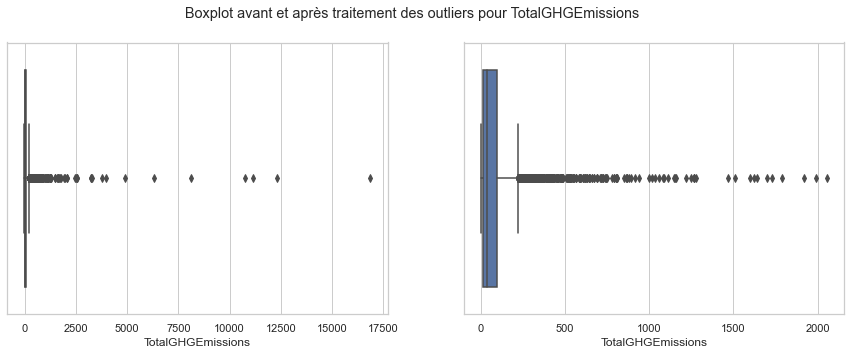

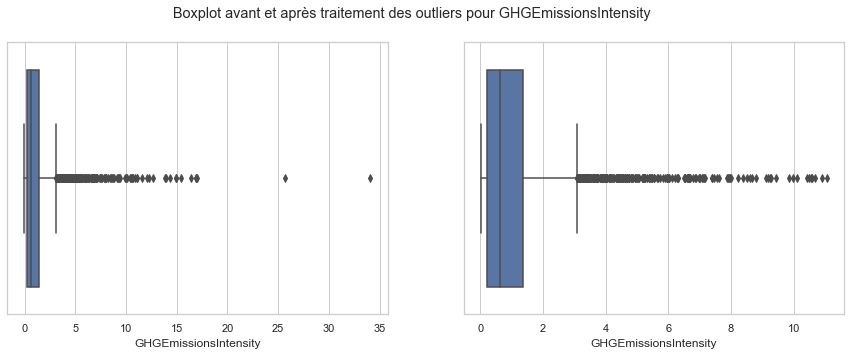

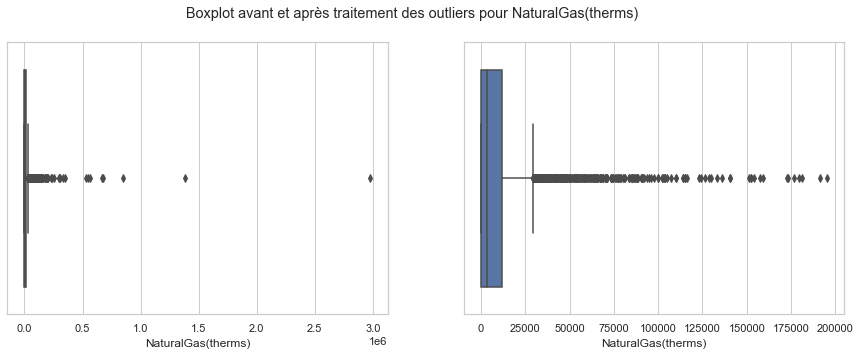

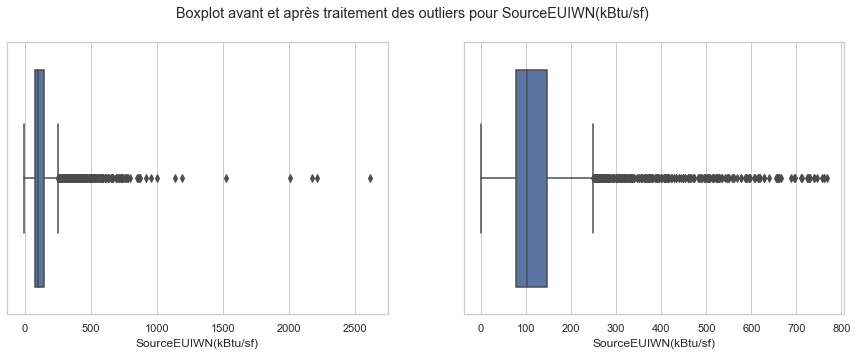

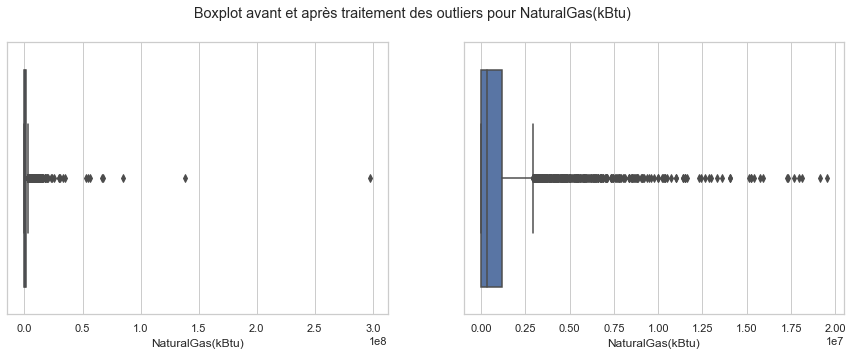

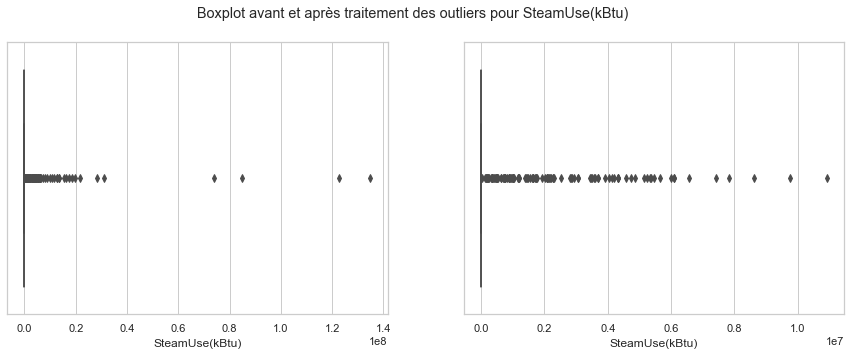

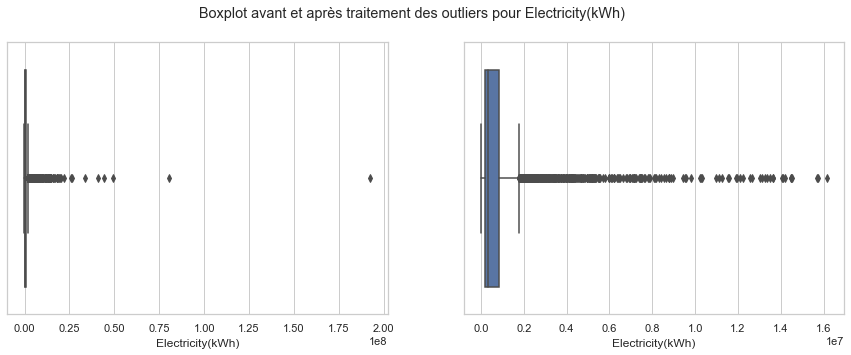

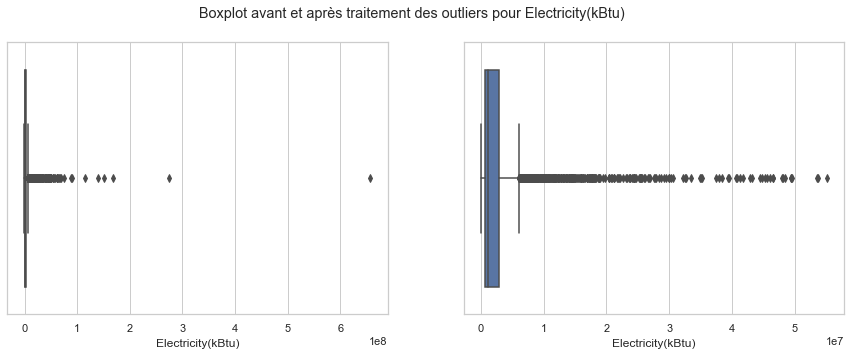

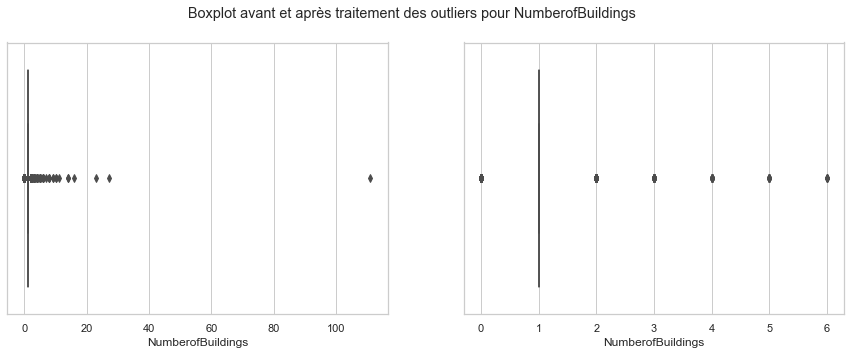

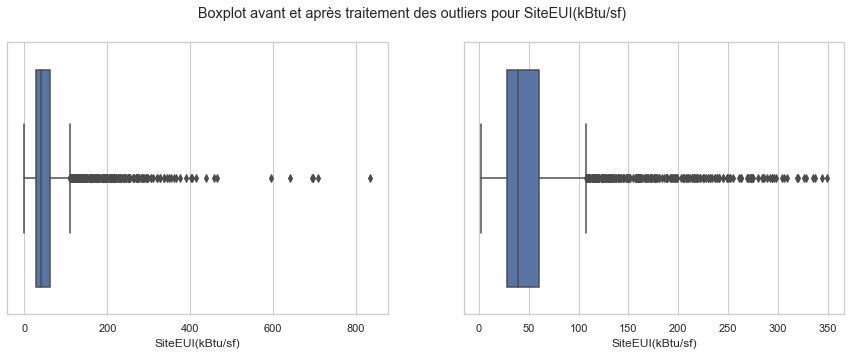

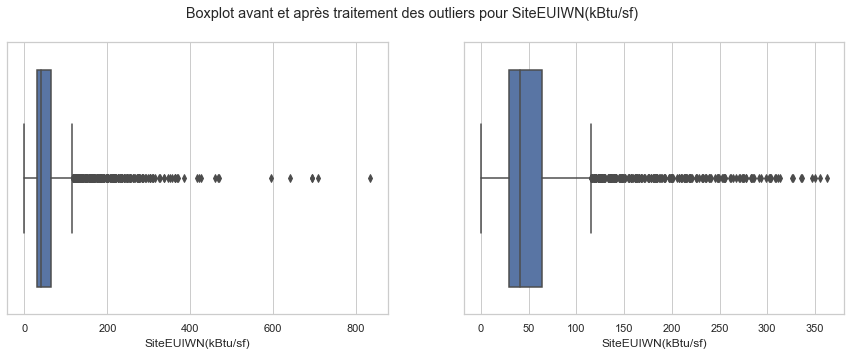

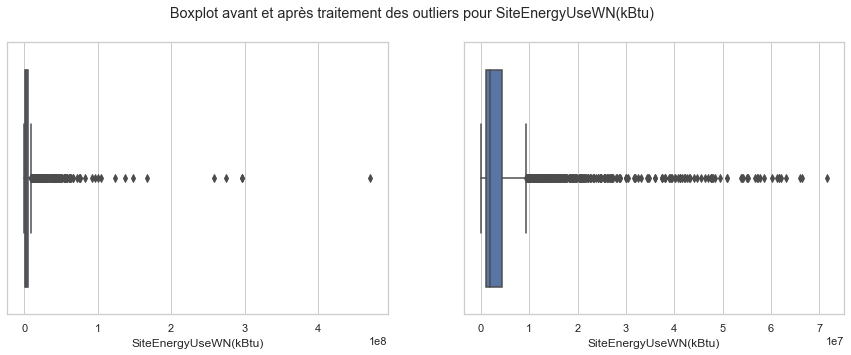

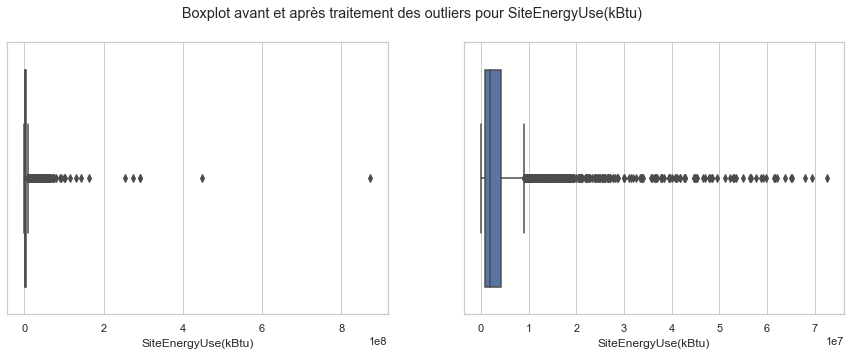

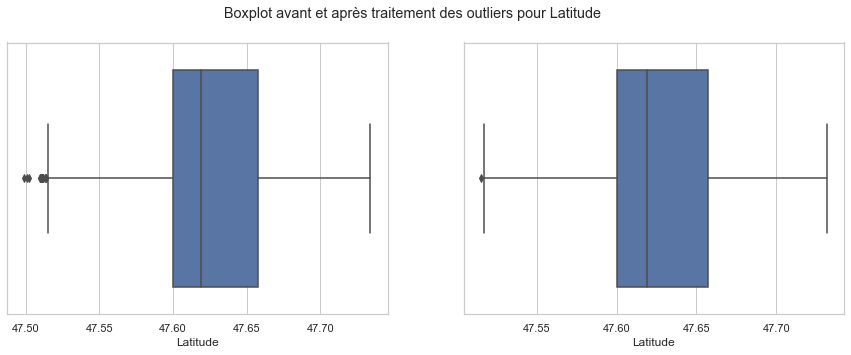

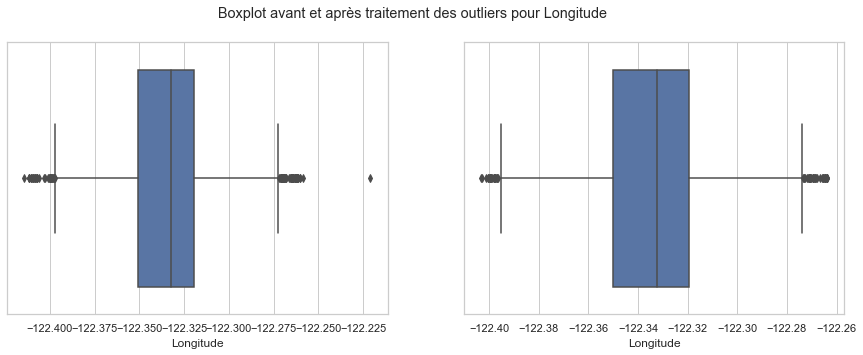

In [13]:
col = df_2016_v3b.select_dtypes(include = ['int32','float64']).columns.tolist()

for i in col: 

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs = axs.ravel()
    
    sns.boxplot(x=df_2016_v3[i],ax=axs[0])
    sns.boxplot(x=df_2016_v3b[i],ax=axs[1])
    titre = 'Boxplot avant et après traitement des outliers pour '+i
    fig.suptitle(titre)
    
    
    plt.show()


## Supression des batiment résidentiel

In [14]:
df_2016_v3b['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

On élimine les lignes pour lesquels BuildingType vaut :
- Multifamily MR (5-9)
- Multifamily HR (10+)
- Multifamily LR (1-4)
    

In [15]:
index_resi = list(df_2016_v3b[df_2016_v3b['BuildingType']=='Multifamily LR (1-4)'].index)+list(df_2016_v3b[df_2016_v3b['BuildingType']=='Multifamily MR (5-9)'].index)+list(df_2016_v3b[df_2016_v3b['BuildingType']=='Multifamily HR (10+)'].index)

In [16]:
len(index_resi)

1693

In [17]:
df_2016_v4=df_2016_v3b.drop(index_resi)

In [18]:
df_2016_v4

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,LargestPropertyUseTypeGFA,LargestPropertyUseType,ZipCode,SourceEUI(kBtu/sf),ListOfAllPropertyUseTypes,TotalGHGEmissions,GHGEmissionsIntensity,...,DefaultData,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),OSEBuildingID
0,NaN,NaN,60.0,88434.0,Hotel,98101.0,182.500000,Hotel,249.98,2.83,...,False,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,88434,1
1,Parking,15064.0,61.0,83880.0,Hotel,98101.0,176.100006,"Hotel, Parking, Restaurant",295.86,2.86,...,False,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,88502,2
2,NaN,NaN,43.0,756493.0,Hotel,98101.0,241.899994,Hotel,NaN,2.19,...,False,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,759392,3
3,NaN,NaN,56.0,61320.0,Hotel,98101.0,216.199997,Hotel,286.43,4.67,...,False,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,61320,5
4,Parking,68009.0,75.0,123445.0,Hotel,98121.0,211.399994,"Hotel, Parking, Swimming Pool",505.01,2.88,...,False,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,113580,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NaN,NaN,46.0,12294.0,Office,NaN,161.699997,Office,20.94,1.70,...,True,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,12294,50222
3372,NaN,NaN,NaN,16000.0,Other - Recreation,NaN,114.199997,Other - Recreation,32.17,2.01,...,False,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,16000,50223
3373,Fitness Center/Health Club/Gym,5574.0,NaN,NaN,Other - Recreation,NaN,744.799988,"Fitness Center/Health Club/Gym, Other - Recrea...",223.54,NaN,...,False,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,13157,50224
3374,Fitness Center/Health Club/Gym,6501.0,NaN,NaN,Other - Recreation,NaN,105.300003,"Fitness Center/Health Club/Gym, Food Service, ...",22.11,1.57,...,False,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,14101,50225


## Imputation des colonnes object

In [19]:
for i in proportion_nan.index :
    if proportion_nan[i] > 0 and proportion_nan[i] <80 :
        print(i,' : ',df_2016[i].dtypes,' : ',proportion_nan[i])

SecondLargestPropertyUseType  :  object  :  50.26913875598086
SecondLargestPropertyUseTypeGFA  :  float64  :  50.26913875598086
ENERGYSTARScore  :  float64  :  24.94019138755981
LargestPropertyUseTypeGFA  :  float64  :  0.5980861244019139
LargestPropertyUseType  :  object  :  0.5980861244019139
ZipCode  :  float64  :  0.47846889952153115
SourceEUI(kBtu/sf)  :  float64  :  0.2691387559808613
ListOfAllPropertyUseTypes  :  object  :  0.2691387559808613
TotalGHGEmissions  :  float64  :  0.2691387559808613
GHGEmissionsIntensity  :  float64  :  0.2691387559808613
NaturalGas(therms)  :  float64  :  0.2691387559808613
SourceEUIWN(kBtu/sf)  :  float64  :  0.2691387559808613
NaturalGas(kBtu)  :  float64  :  0.2691387559808613
SteamUse(kBtu)  :  float64  :  0.2691387559808613
Electricity(kWh)  :  float64  :  0.2691387559808613
Electricity(kBtu)  :  float64  :  0.2691387559808613
NumberofBuildings  :  float64  :  0.23923444976076558
SiteEUI(kBtu/sf)  :  float64  :  0.20933014354066987
SiteEUIWN(kB

les colonnes LargestPropertyUseType, SecondLargestPropertyUseType et ListOfAllPropertyUseTypes sont de type object et possèdent des valeurs manquantes.<br>
Nous devons verifier les valeurs de ces colonnes avant de passer à l'imputation

In [20]:
for i in  ['LargestPropertyUseType','ListOfAllPropertyUseTypes','SecondLargestPropertyUseType']:
    print(i,' : ', len(df_2016_v4[i].unique()),'\n')

LargestPropertyUseType  :  57 

ListOfAllPropertyUseTypes  :  373 

SecondLargestPropertyUseType  :  48 



Nous allons remplacer les valeurs manquantes par 'no information'

In [21]:
df_2016_v4['LargestPropertyUseType'] = df_2016_v4['LargestPropertyUseType'].fillna('no information')
df_2016_v4['ListOfAllPropertyUseTypes'] = df_2016_v4['ListOfAllPropertyUseTypes'].fillna('no information')
df_2016_v4['SecondLargestPropertyUseType'] = df_2016_v4['SecondLargestPropertyUseType'].fillna('no information')

In [22]:
df_2016_v4

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,LargestPropertyUseTypeGFA,LargestPropertyUseType,ZipCode,SourceEUI(kBtu/sf),ListOfAllPropertyUseTypes,TotalGHGEmissions,GHGEmissionsIntensity,...,DefaultData,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),OSEBuildingID
0,no information,NaN,60.0,88434.0,Hotel,98101.0,182.500000,Hotel,249.98,2.83,...,False,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,88434,1
1,Parking,15064.0,61.0,83880.0,Hotel,98101.0,176.100006,"Hotel, Parking, Restaurant",295.86,2.86,...,False,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,88502,2
2,no information,NaN,43.0,756493.0,Hotel,98101.0,241.899994,Hotel,NaN,2.19,...,False,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,759392,3
3,no information,NaN,56.0,61320.0,Hotel,98101.0,216.199997,Hotel,286.43,4.67,...,False,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,61320,5
4,Parking,68009.0,75.0,123445.0,Hotel,98121.0,211.399994,"Hotel, Parking, Swimming Pool",505.01,2.88,...,False,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,113580,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,no information,NaN,46.0,12294.0,Office,NaN,161.699997,Office,20.94,1.70,...,True,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,12294,50222
3372,no information,NaN,NaN,16000.0,Other - Recreation,NaN,114.199997,Other - Recreation,32.17,2.01,...,False,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,16000,50223
3373,Fitness Center/Health Club/Gym,5574.0,NaN,NaN,Other - Recreation,NaN,744.799988,"Fitness Center/Health Club/Gym, Other - Recrea...",223.54,NaN,...,False,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,13157,50224
3374,Fitness Center/Health Club/Gym,6501.0,NaN,NaN,Other - Recreation,NaN,105.300003,"Fitness Center/Health Club/Gym, Food Service, ...",22.11,1.57,...,False,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,14101,50225


## Elimination des colonnes non utiles a l'analyse 

On supprime les colonnes non utiles 


**Liste des différentes colonnes énergétiques et emission:**

* SiteEUI(kBtu/sf) 
* SiteEUIWN(kBtu/sf) 
* SourceEUI(kBtu/sf) 
* SourceEUIWN(kBtu/sf) 
* SiteEnergyUse(kBtu) 
* SiteEnergyUseWN(kBtu)
* SteamUse(kBtu) 
* Electricity(kWh)
* Electricity(kBtu) 
* NaturalGas(therms) 
* NaturalGas(kBtu)
* TotalGHGEmissions
* GHGEmissionsIntensity


L'intérêt de ce projet est de prédire la consommation d'énergie ainsi que les emission de CO2. Parmis la liste des colonnes energetique, nous avons qu'1 variable qui décrit cette consommation :
* SiteEnergyUseWN(kBtu)

et concernant les emission CO2 nous avons la variables :
* TotalGHGEmissions

On peut donc supprimer les autres variables energetique 


In [23]:
non_necessaire=['OSEBuildingID','Address','City','DataYear',
                'State','ZipCode','PropertyName','DefaultData',
                'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
                'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)',
                'NaturalGas(therms)','NaturalGas(kBtu)','GHGEmissionsIntensity',
                'SiteEnergyUse(kBtu)','ListOfAllPropertyUseTypes']


#,'TaxParcelIdentificationNumber'

In [24]:
df_2016_v5 = df_2016_v4.copy().drop(non_necessaire, axis = 1) 

In [25]:
proportion_nan2 = df_2016_v5.isna().sum().divide(df_2016_v5.shape[0]/100).sort_values(ascending=False)
proportion_nan2

SecondLargestPropertyUseTypeGFA    49.182314
ENERGYSTARScore                    34.403392
LargestPropertyUseTypeGFA           2.422774
TotalGHGEmissions                   1.938219
SiteEnergyUseWN(kBtu)               1.211387
Latitude                            1.029679
Longitude                           0.847971
NumberofBuildings                   0.787402
PropertyGFABuilding(s)              0.000000
TaxParcelIdentificationNumber       0.000000
LargestPropertyUseType              0.000000
PrimaryPropertyType                 0.000000
BuildingType                        0.000000
PropertyGFAParking                  0.000000
ComplianceStatus                    0.000000
CouncilDistrictCode                 0.000000
Neighborhood                        0.000000
YearBuilt                           0.000000
NumberofFloors                      0.000000
PropertyGFATotal                    0.000000
SecondLargestPropertyUseType        0.000000
dtype: float64

## Imputation via KNNimputer

In [26]:
col_nan = proportion_nan2[proportion_nan2>0].index.tolist()
col_comp = proportion_nan2[proportion_nan2==0].index.tolist()
for i in ['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUseWN(kBtu)'] :
    col_nan.remove(i)
    col_comp.append(i)

In [27]:
col_nan

['SecondLargestPropertyUseTypeGFA',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'Longitude',
 'NumberofBuildings']

In [28]:
df_nan =df_2016_v5.copy()[col_nan]
df_comp = df_2016_v5.copy()[col_comp]

In [29]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_nan)
df_nan_imp = pd.DataFrame(imputed, columns=df_nan.columns,index=list(df_nan.index))

In [30]:
df_2016_v6 = pd.concat([df_nan_imp,df_comp],axis=1)

In [31]:
df_2016_v6.dtypes

SecondLargestPropertyUseTypeGFA    float64
LargestPropertyUseTypeGFA          float64
Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
PropertyGFABuilding(s)               int64
TaxParcelIdentificationNumber       object
LargestPropertyUseType              object
PrimaryPropertyType                 object
BuildingType                        object
PropertyGFAParking                   int64
ComplianceStatus                    object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofFloors                       int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
ENERGYSTARScore                    float64
TotalGHGEmissions                  float64
SiteEnergyUseWN(kBtu)              float64
dtype: object

In [32]:
df_2016_v6['Neighborhood'] = df_2016_v6['Neighborhood'].str.lower()

In [33]:
df_2016_v6['Age']=2016-df_2016_v6['YearBuilt']
del(df_2016_v6['YearBuilt'])

In [34]:
df_2016_v7 = df_2016_v6.copy()

In [35]:
df_2016_v7

,SecondLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA,Latitude,Longitude,NumberofBuildings,PropertyGFABuilding(s),TaxParcelIdentificationNumber,LargestPropertyUseType,PrimaryPropertyType,BuildingType,...,ComplianceStatus,CouncilDistrictCode,Neighborhood,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUseWN(kBtu),Age
0,191491.8,88434.0,47.61220,-122.33799,1.0,88434,0659000030,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,12,88434,no information,60.0,249.98,7.456910e+06,89
1,15064.0,83880.0,47.61317,-122.33393,1.0,88502,0659000220,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,11,103566,Parking,61.0,295.86,8.664479e+06,20
2,168875.2,756493.0,47.61393,-122.33810,1.0,759392,0659000475,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,41,956110,no information,43.0,NaN,NaN,47
3,191491.8,61320.0,47.61412,-122.33664,1.0,61320,0659000640,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,10,61320,no information,56.0,286.43,6.946800e+06,90
4,68009.0,123445.0,47.61375,-122.34047,1.0,113580,0659000970,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,18,175580,Parking,75.0,505.01,1.465650e+07,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,6245.4,12294.0,47.56722,-122.31154,1.0,12294,1624049080,Office,Office,Nonresidential COS,...,Error - Correct Default Data,2,greater duwamish,1,12294,no information,46.0,20.94,9.430032e+05,26
3372,95482.8,16000.0,47.59625,-122.32283,1.0,16000,3558300000,Other - Recreation,Other,Nonresidential COS,...,Compliant,2,downtown,1,16000,no information,NaN,32.17,1.053706e+06,12
3373,5574.0,48105.6,47.63644,-122.35784,1.0,13157,1794501150,Other - Recreation,Other,Nonresidential COS,...,Compliant,7,magnolia / queen anne,1,13157,Fitness Center/Health Club/Gym,NaN,223.54,6.053764e+06,42
3374,6501.0,45800.8,47.52832,-122.32431,1.0,14101,7883603155,Other - Recreation,Mixed Use Property,Nonresidential COS,...,Compliant,1,greater duwamish,1,14101,Fitness Center/Health Club/Gym,NaN,22.11,7.828413e+05,27


In [36]:
df_2016_v7 = df_2016_v7.dropna(subset=['ENERGYSTARScore'])
df_2016_v7 = df_2016_v7.dropna(subset=['TotalGHGEmissions'])
df_2016_v7 = df_2016_v7.dropna(subset=['SiteEnergyUseWN(kBtu)'])
df_2016_v7

,SecondLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA,Latitude,Longitude,NumberofBuildings,PropertyGFABuilding(s),TaxParcelIdentificationNumber,LargestPropertyUseType,PrimaryPropertyType,BuildingType,...,ComplianceStatus,CouncilDistrictCode,Neighborhood,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUseWN(kBtu),Age
0,191491.8,88434.0,47.61220,-122.33799,1.0,88434,0659000030,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,12,88434,no information,60.0,249.98,7.456910e+06,89
1,15064.0,83880.0,47.61317,-122.33393,1.0,88502,0659000220,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,11,103566,Parking,61.0,295.86,8.664479e+06,20
3,191491.8,61320.0,47.61412,-122.33664,1.0,61320,0659000640,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,10,61320,no information,56.0,286.43,6.946800e+06,90
4,68009.0,123445.0,47.61375,-122.34047,1.0,113580,0659000970,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,18,175580,Parking,75.0,505.01,1.465650e+07,36
6,191503.6,81352.0,47.61390,-122.33283,1.0,83008,0660000825,Hotel,Hotel,NonResidential,...,Compliant,7,downtown,11,83008,no information,27.0,176.14,6.062768e+06,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,6245.4,24990.0,47.53161,-122.29944,1.0,24990,2824049007,Office,Small- and Mid-Sized Office,NonResidential,...,Compliant,2,greater duwamish,2,24990,no information,9.0,134.80,4.731814e+06,87
3347,0.0,45728.0,47.58831,-122.30650,1.0,45000,7548300840,K-12 School,K-12 School,NonResidential,...,Compliant,3,greater duwamish,3,45000,Parking,77.0,9.24,1.397742e+06,1
3366,6834.0,13661.0,47.63572,-122.37525,1.0,13661,2425039137,Office,Office,Nonresidential COS,...,Error - Correct Default Data,7,magnolia / queen anne,1,13661,no information,75.0,3.50,5.585251e+05,64
3369,70037.4,15398.0,47.56440,-122.27813,1.0,15398,4154300585,Office,Office,Nonresidential COS,...,Error - Correct Default Data,2,southeast,1,15398,no information,93.0,7.79,4.141724e+05,56


# Analyse 

In [37]:
df_num = df_2016_v7.copy().select_dtypes(include=['float64','int64'])

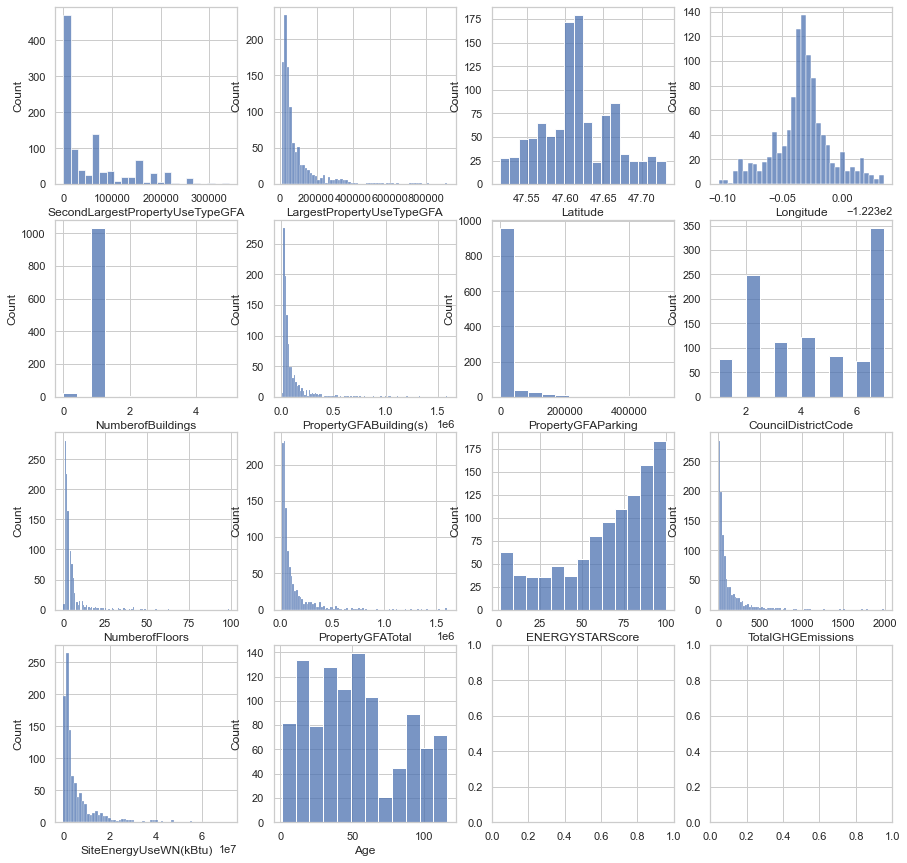

In [38]:
fig, axs = plt.subplots(4,4,figsize=(15,15))
axs = axs.ravel()
a=0
col=list(df_num.columns)
for i in col: 
    sns.histplot(df_num[i],ax=axs[a])
    a+=1
plt.show()

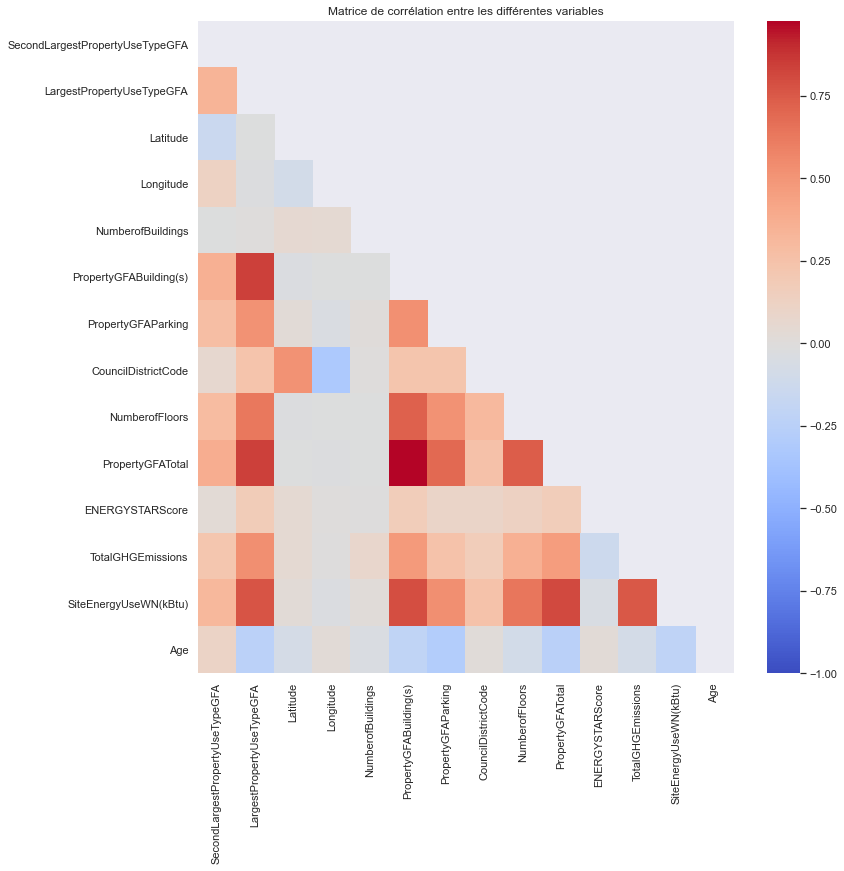

In [39]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
plt.title('Matrice de corrélation entre les différentes variables')

corr = df_num.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

In [40]:
corr['LargestPropertyUseTypeGFA']

SecondLargestPropertyUseTypeGFA    0.340392
LargestPropertyUseTypeGFA          1.000000
Latitude                          -0.013949
Longitude                         -0.020417
NumberofBuildings                 -0.002334
PropertyGFABuilding(s)             0.840965
PropertyGFAParking                 0.520214
CouncilDistrictCode                0.242650
NumberofFloors                     0.631065
PropertyGFATotal                   0.840596
ENERGYSTARScore                    0.174872
TotalGHGEmissions                  0.531934
SiteEnergyUseWN(kBtu)              0.774763
Age                               -0.240516
Name: LargestPropertyUseTypeGFA, dtype: float64

# Feature Engenerring 

## Passage au log

In [41]:
var_interet =['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']

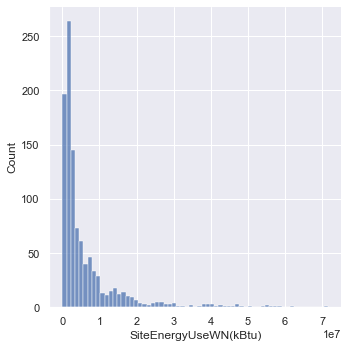

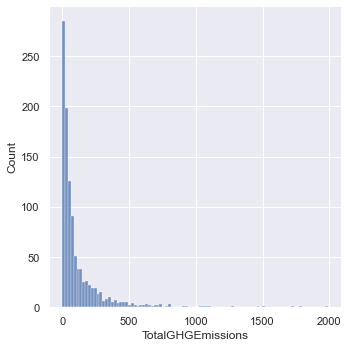

In [42]:
for i in var_interet :
    sns.displot(df_2016_v7[i])

C:\Users\Agint\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)_log', ylabel='Density'>

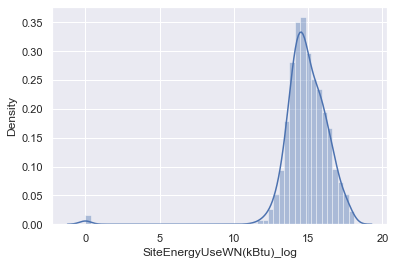

In [43]:
df_2016_v7['SiteEnergyUseWN(kBtu)_log'] = np.log(1+df_2016_v7['SiteEnergyUseWN(kBtu)']) #TotalGHGEmissions
sns.distplot(df_2016_v7['SiteEnergyUseWN(kBtu)_log'])

C:\Users\Agint\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalGHGEmissions_log', ylabel='Density'>

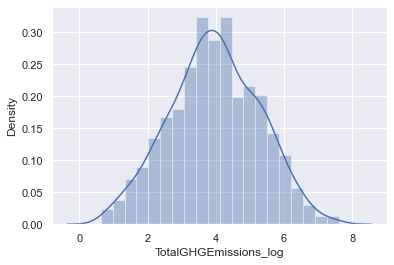

In [44]:
df_2016_v7['TotalGHGEmissions_log'] = np.log(1+df_2016_v7['TotalGHGEmissions']) #TotalGHGEmissions
sns.distplot(df_2016_v7['TotalGHGEmissions_log'])

In [45]:
df_2016_vf = df_2016_v7.copy().drop(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'],axis=1)

In [46]:
df_2016_vf.dtypes

SecondLargestPropertyUseTypeGFA    float64
LargestPropertyUseTypeGFA          float64
Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
PropertyGFABuilding(s)               int64
TaxParcelIdentificationNumber       object
LargestPropertyUseType              object
PrimaryPropertyType                 object
BuildingType                        object
PropertyGFAParking                   int64
ComplianceStatus                    object
CouncilDistrictCode                  int64
Neighborhood                        object
NumberofFloors                       int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
ENERGYSTARScore                    float64
Age                                  int64
SiteEnergyUseWN(kBtu)_log          float64
TotalGHGEmissions_log              float64
dtype: object

## Réunification des PropertyUse

In [47]:
df_test = df_2016_vf.copy()[['SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA','LargestPropertyUseType','SecondLargestPropertyUseType']]

In [48]:
df_test

,SecondLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA,LargestPropertyUseType,SecondLargestPropertyUseType
0,191491.8,88434.0,Hotel,no information
1,15064.0,83880.0,Hotel,Parking
3,191491.8,61320.0,Hotel,no information
4,68009.0,123445.0,Hotel,Parking
6,191503.6,81352.0,Hotel,no information
...,...,...,...,...
3339,6245.4,24990.0,Office,no information
3347,0.0,45728.0,K-12 School,Parking
3366,6834.0,13661.0,Office,no information
3369,70037.4,15398.0,Office,no information


In [49]:
ls_LPUT = set(df_test['LargestPropertyUseType'])
ls_SLPUT = set(df_test['SecondLargestPropertyUseType'])

In [50]:
ls_property = list()
for i in list(set(list(ls_LPUT)+list(ls_SLPUT))):
    i = "PropertyUseType__"+i
    ls_property.append(i)

df_property = pd.DataFrame(np.zeros((1063,len(ls_property))),columns=ls_property,index=df_test.index)

In [51]:
for i in df_test.index :
    prop1 = df_test['LargestPropertyUseType'][i]
    prop2 = df_test['SecondLargestPropertyUseType'][i]
    col_prop1 = "PropertyUseType__"+prop1
    col_prop2 = "PropertyUseType__"+prop2
    df_property[col_prop1][i] = df_test['LargestPropertyUseTypeGFA'][i]/(df_test['SecondLargestPropertyUseTypeGFA'][i]+df_test['LargestPropertyUseTypeGFA'][i])*100
    df_property[col_prop2][i] = df_test['SecondLargestPropertyUseTypeGFA'][i]/(df_test['SecondLargestPropertyUseTypeGFA'][i]+df_test['LargestPropertyUseTypeGFA'][i])*100
    
  

In [52]:
df_2016_vf = df_2016_vf.drop(['SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA','LargestPropertyUseType','SecondLargestPropertyUseType'],axis=1)

In [53]:
df_property

,PropertyUseType__Courthouse,PropertyUseType__Other - Restaurant/Bar,PropertyUseType__Laboratory,PropertyUseType__College/University,PropertyUseType__Office,PropertyUseType__Senior Care Community,PropertyUseType__Self-Storage Facility,PropertyUseType__Data Center,PropertyUseType__Pre-school/Daycare,PropertyUseType__Retail Store,...,PropertyUseType__Convenience Store without Gas Station,PropertyUseType__Wholesale Club/Supercenter,PropertyUseType__Parking,PropertyUseType__Refrigerated Warehouse,PropertyUseType__Bank Branch,PropertyUseType__Adult Education,PropertyUseType__Non-Refrigerated Warehouse,PropertyUseType__Distribution Center,PropertyUseType__Other,PropertyUseType__Other - Recreation
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.224774,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.522371,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,0.0,0.0,0.0,0.0,80.005379,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3347,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3366,0.0,0.0,0.0,0.0,66.655282,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3369,0.0,0.0,0.0,0.0,18.022974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_2016_vf2 = pd.concat([df_2016_vf,df_property],axis=1)

In [55]:
df_2016_vf2

,Latitude,Longitude,NumberofBuildings,PropertyGFABuilding(s),TaxParcelIdentificationNumber,PrimaryPropertyType,BuildingType,PropertyGFAParking,ComplianceStatus,CouncilDistrictCode,...,PropertyUseType__Convenience Store without Gas Station,PropertyUseType__Wholesale Club/Supercenter,PropertyUseType__Parking,PropertyUseType__Refrigerated Warehouse,PropertyUseType__Bank Branch,PropertyUseType__Adult Education,PropertyUseType__Non-Refrigerated Warehouse,PropertyUseType__Distribution Center,PropertyUseType__Other,PropertyUseType__Other - Recreation
0,47.61220,-122.33799,1.0,88434,0659000030,Hotel,NonResidential,0,Compliant,7,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.61317,-122.33393,1.0,88502,0659000220,Hotel,NonResidential,15064,Compliant,7,...,0.0,0.0,15.224774,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.61412,-122.33664,1.0,61320,0659000640,Hotel,NonResidential,0,Compliant,7,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.61375,-122.34047,1.0,113580,0659000970,Hotel,NonResidential,62000,Compliant,7,...,0.0,0.0,35.522371,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,47.61390,-122.33283,1.0,83008,0660000825,Hotel,NonResidential,0,Compliant,7,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,47.53161,-122.29944,1.0,24990,2824049007,Small- and Mid-Sized Office,NonResidential,0,Compliant,2,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3347,47.58831,-122.30650,1.0,45000,7548300840,K-12 School,NonResidential,0,Compliant,3,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3366,47.63572,-122.37525,1.0,13661,2425039137,Office,Nonresidential COS,0,Error - Correct Default Data,7,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3369,47.56440,-122.27813,1.0,15398,4154300585,Office,Nonresidential COS,0,Error - Correct Default Data,2,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Export des données

In [57]:
df_2016_vf2.to_csv ('dataset_cleane.csv', index = False, header=True)

#### 